# Linear Regression with PyTorch

## About Linear regression

#### Simple Linear Regression basics

* Allow us to understand relationship between tow continous variables

* Example
    * x: independent variable
        * weight
    * y: dependent variable
        * height
    * y = ⍺x + β

##### Example of Simple Linear Regression

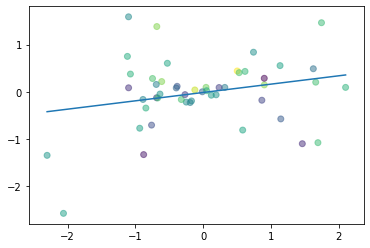

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

### Aim of Linear Regression
* Minimize the distance between the points and the line (y = ⍺x + β)
* Adjusting 
    * Coefficient: ⍺
    * Bias/Intercept: β

### Building a Linear Regression Model with PyTorch
* Example
    * Coefficient: ⍺ = 2
    * Bias/Intercept: β = 1
    * Equation: y = 2x + 1

### Building a Toy Dataset

In [2]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Convert to numpy array
x_train = np.array(x_values,dtype=np.float32)
x_train

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [4]:
x_train.shape

(11,)

In [5]:
# Important: 2D required
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [6]:
y_values = [2 * i for i in x_values]
y_values

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [7]:
y_train = np.array(y_values,dtype=np.float32)
y_train.shape

(11,)

In [8]:
# Important: 2D required
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

## Building Model

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

### Create Model
* 1. Linear Model
    * True equation: y = 2x + 1
* 2. Forward
    * Example
        * Input x = 1
        * Output ŷ = ?

In [ ]:
# Create Class
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out

## Instantiate Model Class
* Input: [1,2,3,4,5,6,7,8,9,10]
* Output: [1,3,5,7,9,11,13,15,17,19,21]

In [ ]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim,output_dim)

### Instantiate loss class 
* MSE Loss: Mean Square Error
* MSE = $1_{/n}$ $𝛴^{n}_{i=1}$( $ŷ_{i}$ - $y_{i}$ )
    * ŷ: prediction
    * y: true value

In [ ]:
criterion = nn.MSELoss()

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
epochs = 100

In [ ]:
for epoch in range(epochs):
    epoch += 1
    
    # Convert numpy array to torch variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters 
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate loss
    loss = criterion(outputs,labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    #Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {} '.format(epoch,loss))